# [LAB#02] 선형 회귀 (linear regression)

- 분석 데이터: "**제7차 한국인 인체치수 측정 데이터**"
- `scikit-learn`의 `LinearRegression` 사용법
- `statsmodels`의 `OLS` 사용법

In [1]:
%ls

 D 드라이브의 볼륨: data
 볼륨 일련 번호: 4CCA-D5D0

 D:\cloud\Dropbox\cau\02_강의\aiml2023-2\labs\lab02 디렉터리

2023-10-03  오후 06:50    <DIR>          .
2023-09-13  오전 10:07    <DIR>          ..
2023-10-03  오후 06:48    <DIR>          .ipynb_checkpoints
2021-09-03  오후 09:57         4,209,125 2015_7th_korbody.csv
2023-10-03  오후 06:50            15,629 lab02_lr.ipynb
               2개 파일           4,224,754 바이트
               3개 디렉터리  1,856,943,374,336 바이트 남음


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

matplotlib.rcParams['figure.dpi'] = 300

for f in fm.fontManager.ttflist:
    if 'Malgun' in f.name:
        print(f'Font: {f.name}, Path: {f.fname}')

font_path = r"C:\Windows\Fonts\malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font',family=font_name)

%matplotlib inline

Font: Malgun Gothic, Path: C:\Windows\Fonts\malgunbd.ttf
Font: Malgun Gothic, Path: C:\Windows\Fonts\malgunsl.ttf
Font: Malgun Gothic, Path: C:\Windows\Fonts\malgun.ttf


## 데이터 읽기

In [3]:
df = pd.read_csv("2015_7th_korbody.csv", thousands=',')

In [4]:
for i, col in enumerate(df.columns):
    print(col, df.dtypes[i])

ⓞ_02_성별 object
ⓞ_06_나이_반올림 float64
ⓞ_12_골격근량 float64
ⓞ_13_체지방량 float64
ⓞ_14_체수분 float64
ⓞ_15_단백질 float64
ⓞ_16_무기질 float64
ⓞ_17_BMI float64
ⓞ_18_체지방율 float64
ⓞ_19_복부지방율 float64
ⓞ_20_복부지방율평가 object
ⓞ_21_기초대사량 float64
ⓞ_22_기초대사량평가 object
ⓞ_23_근육조절 float64
ⓞ_24_지방조절 float64
①_001_오른쪽어깨경사각 float64
①_002_왼쪽어깨경사각 float64
①_003_키 float64
①_004_눈높이 float64
①_005_목뒤높이 float64
①_006_어깨높이 float64
①_007_어깨가쪽높이 float64
①_008_겨드랑높이 float64
①_009_굽힌팔꿈치높이 float64
①_010_허리기준선높이 float64
①_011_엉덩이높이 float64
①_012_주먹높이 float64
①_013_허리높이 float64
①_014_배꼽수준허리높이 float64
①_015_위앞엉덩뼈가시높이 float64
①_016_무릎높이 float64
①_017_샅높이 float64
①_018_가슴너비 float64
①_019_젖가슴너비 float64
①_020_허리너비 float64
①_021_배꼽수준허리너비 float64
①_022_엉덩이너비 float64
①_023_겨드랑두께 float64
①_024_가슴두께 float64
①_025_젖가슴두께 float64
①_026_허리두께 float64
①_027_배꼽수준허리두께 float64
①_028_엉덩이두께 float64
①_029_몸통수직길이 float64
①_030_엉덩이수직길이 float64
①_031_몸무게 float64
①_032_앞중심길이 float64
①_033_배꼽수준앞중심길이 float64
①_034_겨드랑앞벽사이길이 float64
①_035_겨드랑앞접힘사이길이 float64
①_036_젖꼭지

## 피쳐 (feature) 선택

In [40]:
features = ["①_031_몸무게", "①_003_키", "①_020_허리너비", "①_121_넙다리둘레"]
sdf = df[features].copy()
sdf.dropna(inplace=True)

In [6]:
type(sdf)

pandas.core.frame.DataFrame

## 데이터 나누기

In [7]:
data = sdf.to_numpy()
train_y = data[:, 0]
train_X = data[:, 1:]

In [8]:
type(data)

numpy.ndarray

In [9]:
sdf.shape, data.shape

((6412, 4), (6412, 4))

In [10]:
train_y.shape
train_y.ndim

1

In [11]:
train_X.shape

(6412, 3)

## scikit-learn 선형 회귀 모델 생성 및 학습

In [12]:
model = LinearRegression()
reg = model.fit(train_X, train_y)
bhat = np.zeros(4)
bhat[0] = reg.intercept_
bhat[1:] = reg.coef_

In [13]:
bhat

array([-1.34551409e+02,  5.58926569e-02,  1.97899347e-01,  9.35641475e-02])

## 평가 지표 (evaluation metrics) 계산

In [14]:
yhat = reg.predict(train_X)
rss = np.sum((yhat - train_y)**2)
rmse = np.sqrt(np.mean((yhat - train_y)**2))

print("RSS:", rss)
print("RMSE:", rmse)

RSS: 78809.89681147209
RMSE: 3.5058523571858444


## statsmodels을 이용한 모델 평가

In [15]:
train_y = data[:, 0]
train_X = sm.add_constant(data[:, 1:])

model = sm.OLS(train_y, train_X)  # OLS: Ordinary Least Squares
res = model.fit()

In [16]:
res.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.528e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:53:43   Log-Likelihood:                -17142.
No. Observations:                6412   AIC:                         3.429e+04
Df Residuals:                    6408   BIC:                         3.432e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -134.5514      0.860   -156.374      0.000    -136.238    -132.865
x1             0.0559      0.001    109.157      0.000       0.055       0.057
x2             0.1979      0.002     93.678      0.000       0.194       0.202
x3             0.0936      0.001     70.815      0.000       0.091       0.096
==============================================================================
Omnibus:                      792.100   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8143.118
Skew:                          -0.163   Prob(JB):                         0.00
Kurtosis:                       8.511   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
bhat = res.params
yhat = res.predict(train_X)
rss = np.sum(res.resid**2)  # np.sum((yhat - train_y)**2)
rmse = np.sqrt(np.mean((yhat - train_y)**2))

print("RSS:", rss)
print("RMSE:", rmse)

RSS: 78809.89681147209
RMSE: 3.5058523571858444


## 공선성 (multicollinearity) 분석

In [18]:
sdf.corr()

,①_031_몸무게,①_003_키,①_020_허리너비,①_121_넙다리둘레
①_031_몸무게,1.000000,0.612209,0.822293,0.811637
①_003_키,0.612209,1.000000,0.236324,0.287201
①_020_허리너비,0.822293,0.236324,1.000000,0.717920
①_121_넙다리둘레,0.811637,0.287201,0.717920,1.000000


C:\Users\dwlee\AppData\Local\Temp\ipykernel_12000\134980556.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("bwr")


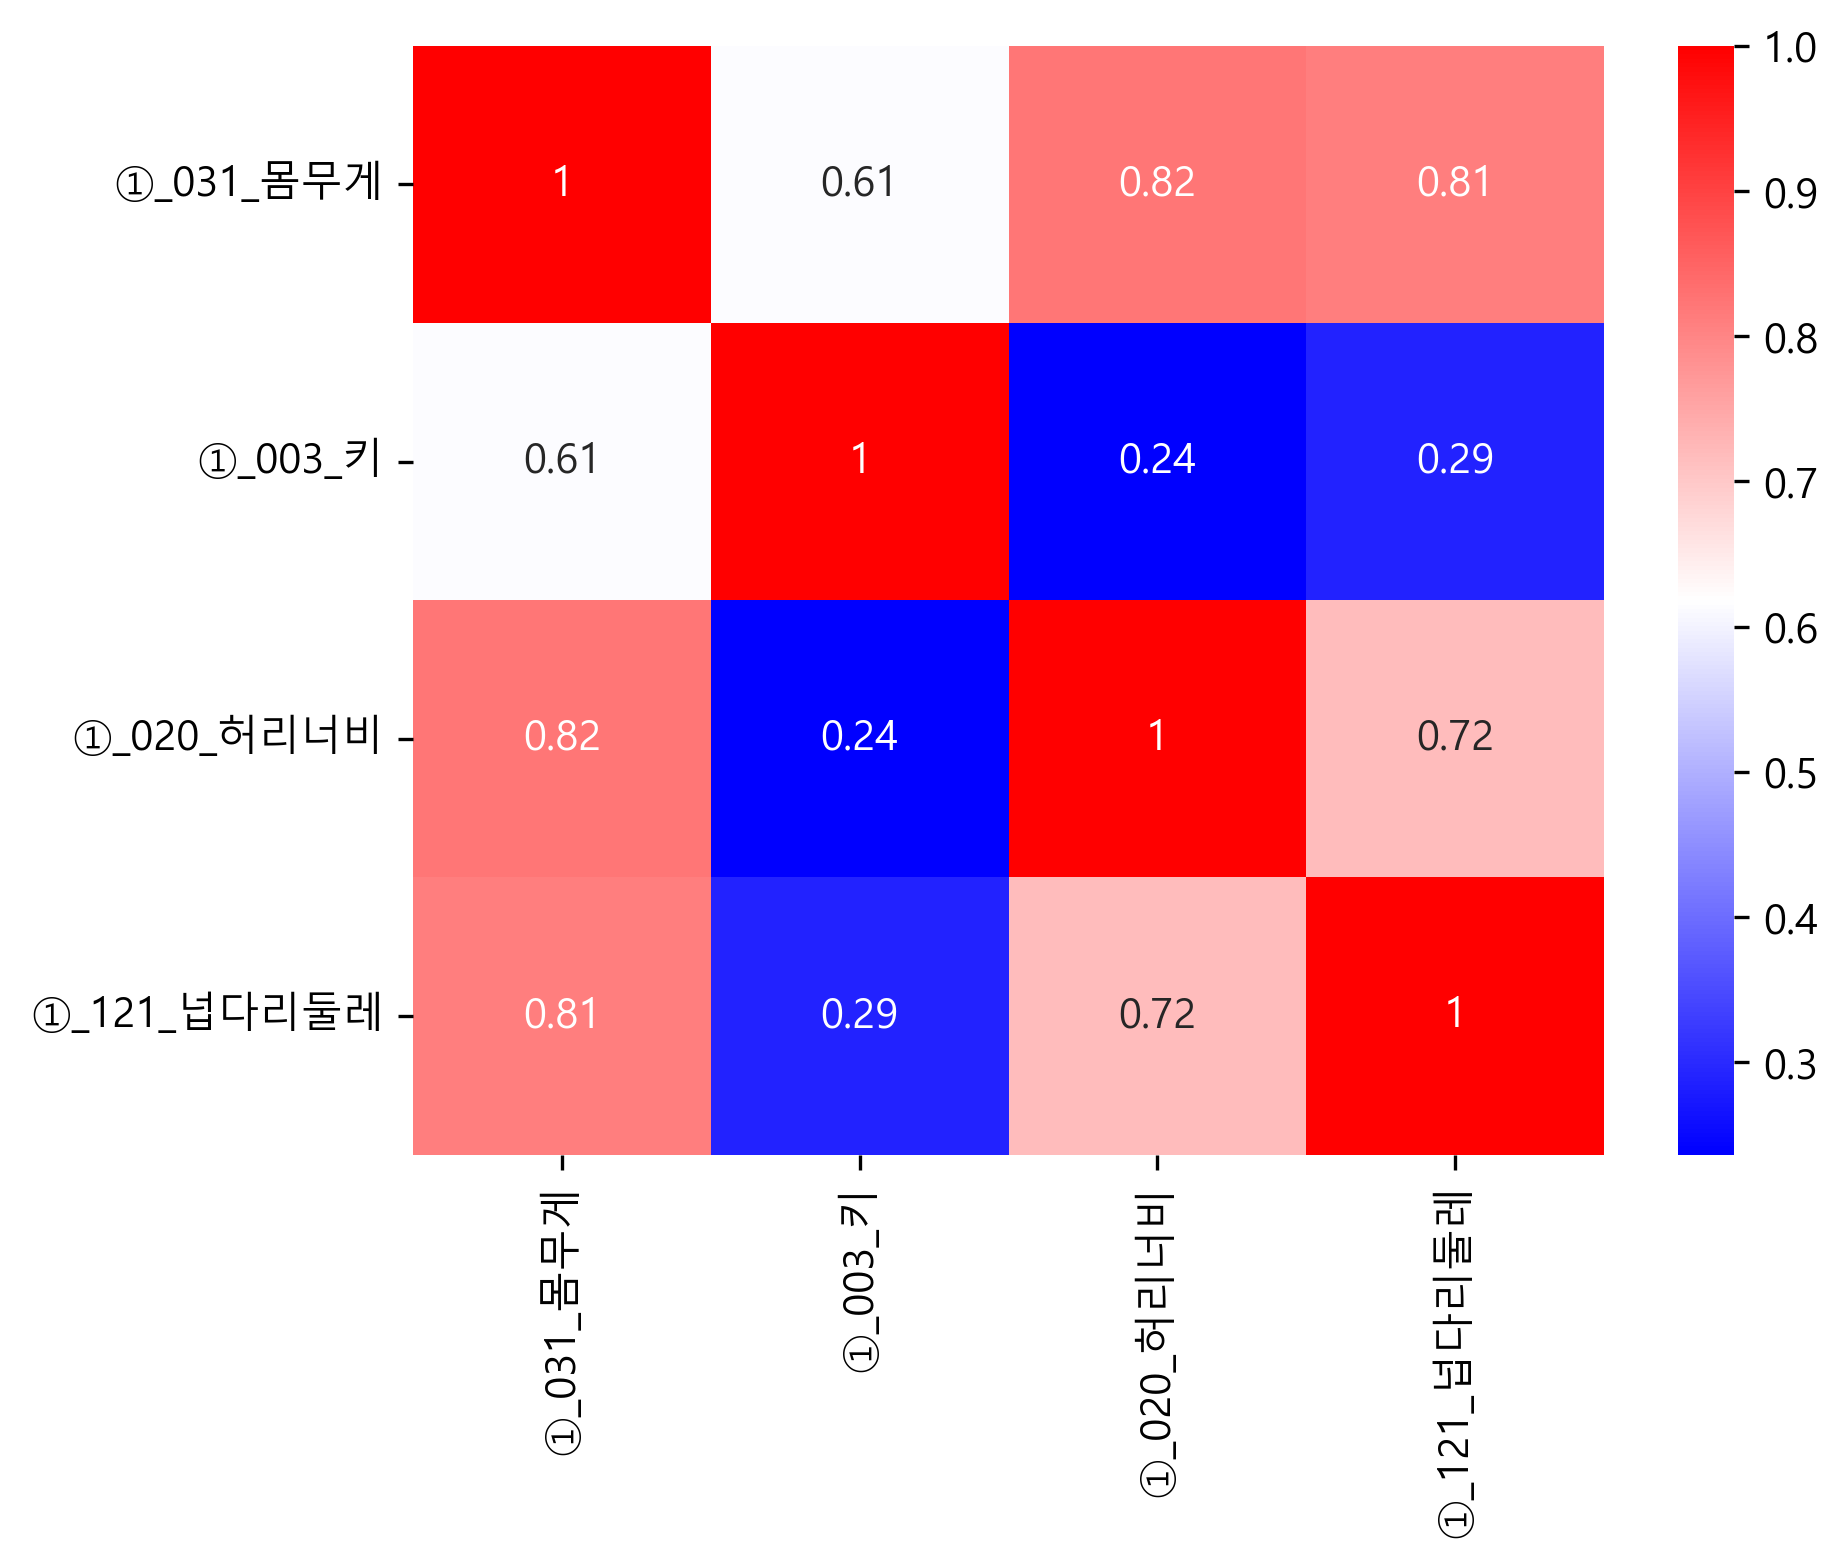

In [19]:
cmap = plt.cm.get_cmap("bwr")
sns.heatmap(sdf.corr(), annot=True, cmap=cmap)
plt.show()

C:\Anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


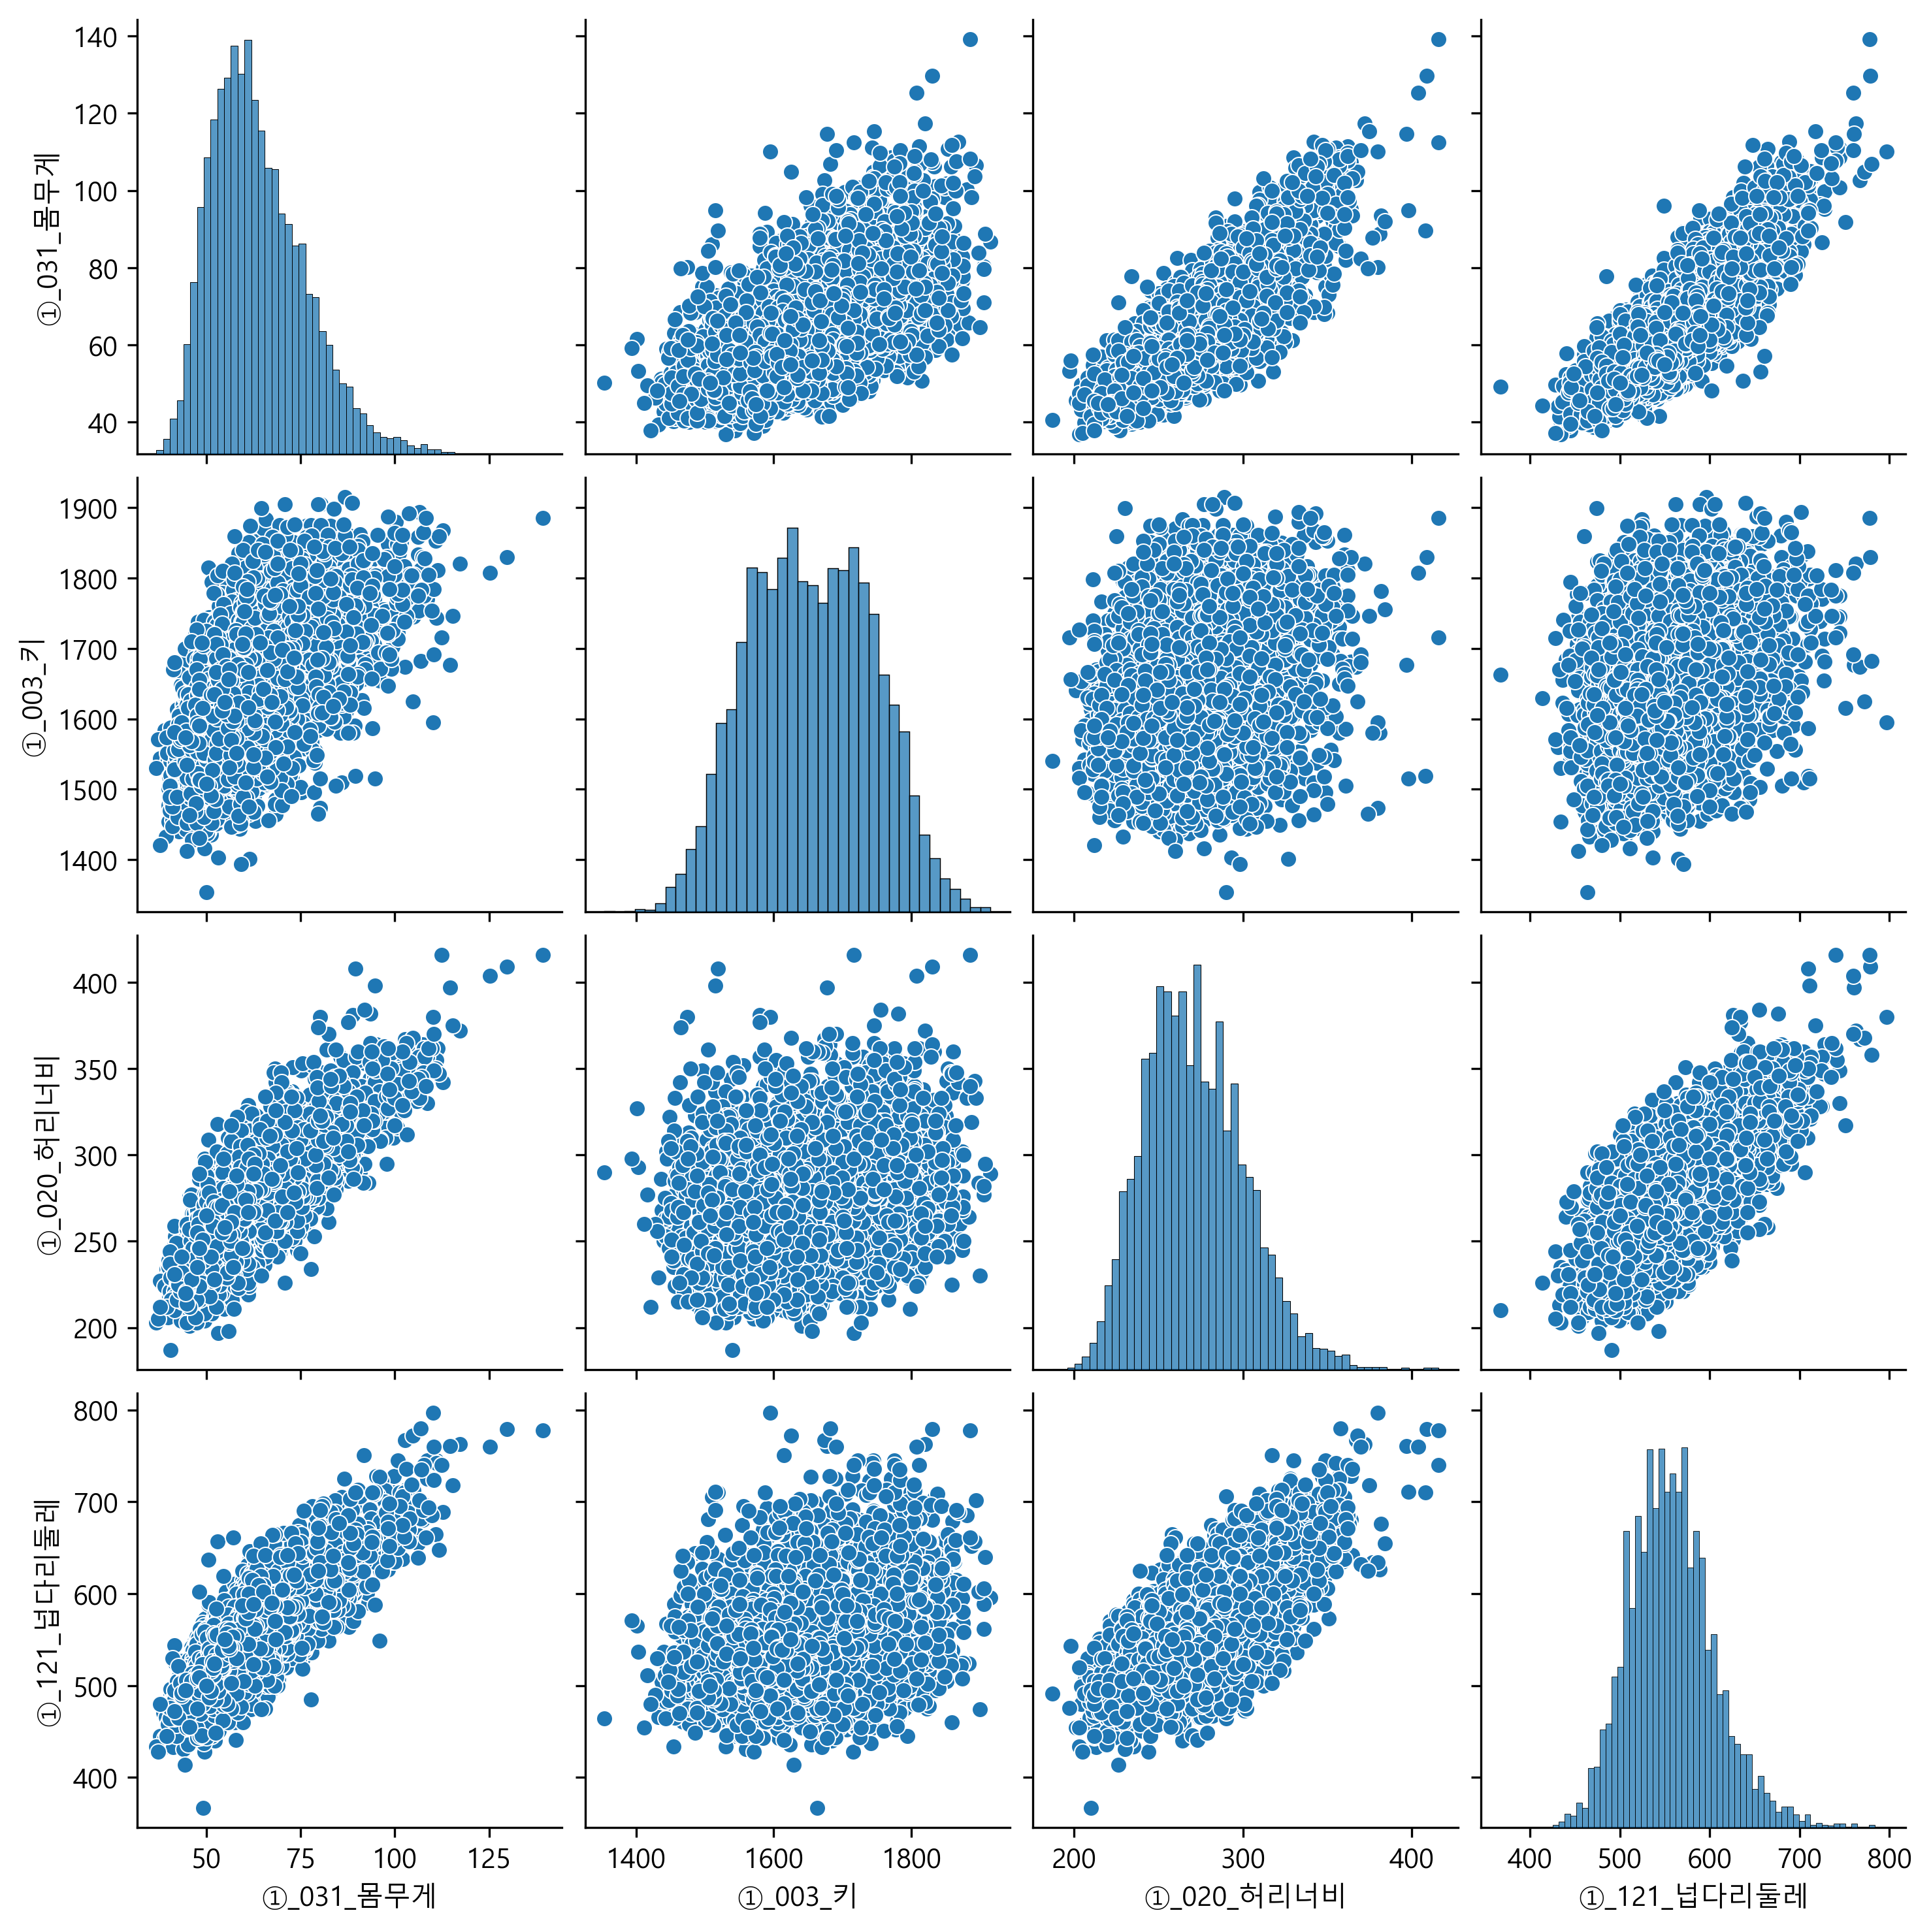

In [20]:
sns.pairplot(sdf)
plt.show()

In [21]:
import statsmodels.stats.outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(sdf.values, i) for i in range(1, sdf.shape[1])]
vif["feature"] = sdf.columns[1:]
vif

,vif,feature
0,135.190438,①_003_키
1,218.977533,①_020_허리너비
2,283.853941,①_121_넙다리둘레


In [22]:
tmp = sdf.drop("①_121_넙다리둘레", axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(tmp.values, i) for i in range(1, tmp.shape[1])]
vif["feature"] = tmp.columns[1:]
vif

,vif,feature
0,83.284951,①_003_키
1,156.668873,①_020_허리너비


In [23]:
tmp = tmp.drop("①_020_허리너비", axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(tmp.values, i) for i in range(1, tmp.shape[1])]
vif["feature"] = tmp.columns[1:]
vif

,vif,feature
0,36.324486,①_003_키


## 전체 데이터 상관관계 분석

In [24]:
features = []
for i, col in enumerate(df.columns):
    if col.startswith("ⓞ_"):
        continue
    if "_여" in col:
        continue
    if not np.issubdtype(df.dtypes[i], np.number):
        continue
        
    print(col, df.dtypes[i])
    features.append(col)

①_001_오른쪽어깨경사각 float64
①_002_왼쪽어깨경사각 float64
①_003_키 float64
①_004_눈높이 float64
①_005_목뒤높이 float64
①_006_어깨높이 float64
①_007_어깨가쪽높이 float64
①_008_겨드랑높이 float64
①_009_굽힌팔꿈치높이 float64
①_010_허리기준선높이 float64
①_011_엉덩이높이 float64
①_012_주먹높이 float64
①_013_허리높이 float64
①_014_배꼽수준허리높이 float64
①_015_위앞엉덩뼈가시높이 float64
①_016_무릎높이 float64
①_017_샅높이 float64
①_018_가슴너비 float64
①_019_젖가슴너비 float64
①_020_허리너비 float64
①_021_배꼽수준허리너비 float64
①_022_엉덩이너비 float64
①_023_겨드랑두께 float64
①_024_가슴두께 float64
①_025_젖가슴두께 float64
①_026_허리두께 float64
①_027_배꼽수준허리두께 float64
①_028_엉덩이두께 float64
①_029_몸통수직길이 float64
①_030_엉덩이수직길이 float64
①_031_몸무게 float64
①_032_앞중심길이 float64
①_033_배꼽수준앞중심길이 float64
①_034_겨드랑앞벽사이길이 float64
①_035_겨드랑앞접힘사이길이 float64
①_037_목둘레 float64
①_038_목밑둘레 float64
①_039_가슴둘레 float64
①_040_젖가슴둘레 float64
①_042_허리둘레 float64
①_043_배꼽수준허리둘레 float64
①_044_배둘레 float64
①_045_엉덩이둘레 float64
①_046_배돌출점기준엉덩이둘레 float64
①_047_어깨길이 float64
①_048_목뒤등뼈위겨드랑수준길이 float64
①_049_등길이 float64
①_050_배꼽수준등길이 float64
①_051_목뒤오금길이

In [25]:
sdf = df[features]

In [26]:
corr = sdf.corr()
corr

,①_001_오른쪽어깨경사각,①_002_왼쪽어깨경사각,①_003_키,①_004_눈높이,①_005_목뒤높이,①_006_어깨높이,①_007_어깨가쪽높이,①_008_겨드랑높이,①_009_굽힌팔꿈치높이,①_010_허리기준선높이,...,①_124_무릎아래둘레,①_125_장딴지둘레,①_126_종아리최소둘레,①_127_발목최대둘레,①_128_발목너비,①_129_발뒤꿈치너비,①_130_위팔둘레,①_131_팔꿈치둘레,①_132_손목둘레,①_133_머리위로뻗은주먹높이
①_001_오른쪽어깨경사각,1.000000,0.635825,0.092247,0.087589,0.084878,-0.019695,-0.021463,0.010909,-0.025070,0.074887,...,-0.017210,0.006862,0.011942,0.056027,-0.035023,-0.026909,-0.001716,-0.042108,-0.003057,0.053157
①_002_왼쪽어깨경사각,0.635825,1.000000,0.043272,0.036551,0.034250,-0.033716,-0.034369,-0.001633,-0.035927,0.026883,...,-0.009160,-0.022258,-0.008032,0.032539,-0.038711,-0.036087,-0.034438,-0.049202,-0.015214,0.023550
①_003_키,0.092247,0.043272,1.000000,0.991485,0.987488,0.980100,0.981032,0.976463,0.958274,0.954750,...,0.451720,0.511071,0.557789,0.691035,0.399399,0.472636,0.443802,0.546700,0.533992,0.952823
①_004_눈높이,0.087589,0.036551,0.991485,1.000000,0.985321,0.978714,0.979050,0.972977,0.959333,0.953519,...,0.440471,0.509193,0.553232,0.689374,0.390308,0.472065,0.457837,0.548614,0.539966,0.950588
①_005_목뒤높이,0.084878,0.034250,0.987488,0.985321,1.000000,0.984738,0.983894,0.975458,0.959638,0.963246,...,0.458122,0.521872,0.562828,0.686281,0.405681,0.482255,0.466204,0.555436,0.542433,0.950134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
①_129_발뒤꿈치너비,-0.026909,-0.036087,0.472636,0.472065,0.482255,0.487822,0.485289,0.436906,0.466169,0.456789,...,0.537135,0.582555,0.601216,0.625326,0.555270,1.000000,0.568253,0.614812,0.613085,0.483162
①_130_위팔둘레,-0.001716,-0.034438,0.443802,0.457837,0.466204,0.472110,0.462448,0.398331,0.480600,0.447946,...,0.651843,0.752831,0.659758,0.675937,0.439461,0.568253,1.000000,0.792796,0.779878,0.459204
①_131_팔꿈치둘레,-0.042108,-0.049202,0.546700,0.548614,0.555436,0.568860,0.566774,0.506093,0.542619,0.540459,...,0.650386,0.705548,0.675712,0.700919,0.512629,0.614812,0.792796,1.000000,0.761194,0.562776
①_132_손목둘레,-0.003057,-0.015214,0.533992,0.539966,0.542433,0.548164,0.542606,0.490401,0.549882,0.510297,...,0.612373,0.652212,0.708222,0.804967,0.469179,0.613085,0.779878,0.761194,1.000000,0.551238


In [27]:
type(corr)

pandas.core.frame.DataFrame

In [28]:
from collections import defaultdict

high_corr_pairs = defaultdict(set)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if corr.iloc[i, j] > 0.8:
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])
            col_i = corr.columns[i]
            col_j = corr.columns[j]
                        
            high_corr_pairs[col_i].add(col_j)
            high_corr_pairs[col_j].add(col_i)
            

①_001_오른쪽어깨경사각 ①_001_오른쪽어깨경사각 1.0
①_002_왼쪽어깨경사각 ①_002_왼쪽어깨경사각 1.0
①_003_키 ①_003_키 1.0
①_003_키 ①_004_눈높이 0.9914851859150747
①_003_키 ①_005_목뒤높이 0.9874879701564978
①_003_키 ①_006_어깨높이 0.9801004664271272
①_003_키 ①_007_어깨가쪽높이 0.9810317260416909
①_003_키 ①_008_겨드랑높이 0.9764632199792087
①_003_키 ①_009_굽힌팔꿈치높이 0.958274363916722
①_003_키 ①_010_허리기준선높이 0.954749721523811
①_003_키 ①_011_엉덩이높이 0.9102940294430897
①_003_키 ①_012_주먹높이 0.8778550158151615
①_003_키 ①_013_허리높이 0.9557083774586272
①_003_키 ①_014_배꼽수준허리높이 0.9503743901530594
①_003_키 ①_015_위앞엉덩뼈가시높이 0.9267478324736318
①_003_키 ①_016_무릎높이 0.8602471624507996
①_003_키 ①_017_샅높이 0.9088480497308514
①_003_키 ①_029_몸통수직길이 0.845116830042232
①_003_키 ①_051_목뒤오금길이 0.9318647640902691
①_003_키 ①_052_총길이 0.9761008241265052
①_003_키 ①_064_팔길이 0.844932148306888
①_003_키 ①_065_팔안쪽길이 0.8165008857126135
①_003_키 ①_066_목뒤손목안쪽길이 0.8531133976193397
①_003_키 ①_069_다리가쪽길이 0.9524199020323292
①_003_키 ①_073_앉은키 0.9124634622603622
①_003_키 ①_074_앉은눈높이 0.8745646166540476
①_003_키 ①_075_앉은목뒤

In [29]:
"①_005_목뒤높이" in high_corr_pairs["①_003_키"]

True

In [30]:
for i, elem in corr[["①_031_몸무게"]].iterrows():
    print(i, elem.values)

①_001_오른쪽어깨경사각 [-0.02674492]
①_002_왼쪽어깨경사각 [-0.0559841]
①_003_키 [0.61220942]
①_004_눈높이 [0.61678822]
①_005_목뒤높이 [0.63197229]
①_006_어깨높이 [0.64423008]
①_007_어깨가쪽높이 [0.63709069]
①_008_겨드랑높이 [0.57470769]
①_009_굽힌팔꿈치높이 [0.64019747]
①_010_허리기준선높이 [0.62232593]
①_011_엉덩이높이 [0.46893361]
①_012_주먹높이 [0.60101245]
①_013_허리높이 [0.55545022]
①_014_배꼽수준허리높이 [0.48568379]
①_015_위앞엉덩뼈가시높이 [0.48640279]
①_016_무릎높이 [0.48864608]
①_017_샅높이 [0.41597961]
①_018_가슴너비 [0.85188642]
①_019_젖가슴너비 [0.889433]
①_020_허리너비 [0.8222931]
①_021_배꼽수준허리너비 [0.75382642]
①_022_엉덩이너비 [0.68003639]
①_023_겨드랑두께 [0.76953106]
①_024_가슴두께 [0.79198183]
①_025_젖가슴두께 [0.6428547]
①_026_허리두께 [0.7797362]
①_027_배꼽수준허리두께 [0.73966924]
①_028_엉덩이두께 [0.71411604]
①_029_몸통수직길이 [0.73086561]
①_030_엉덩이수직길이 [0.59918939]
①_031_몸무게 [1.]
①_032_앞중심길이 [0.55356936]
①_033_배꼽수준앞중심길이 [0.65977291]
①_034_겨드랑앞벽사이길이 [0.77701769]
①_035_겨드랑앞접힘사이길이 [0.76729121]
①_037_목둘레 [0.82596691]
①_038_목밑둘레 [0.72282226]
①_039_가슴둘레 [0.9065569]
①_040_젖가슴둘레 [0.84610975]
①_042_허리둘레 [0.83377212

In [31]:
ser = corr["①_031_몸무게"].sort_values(ascending=False)

In [32]:
ser

①_031_몸무게         1.000000
①_090_위팔사이너비      0.910261
①_039_가슴둘레        0.906557
①_019_젖가슴너비       0.889433
①_070_몸통세로둘레      0.889369
                    ...   
①_113_눈살뒤통수길이     0.244862
①_097_벽면어깨수평길이    0.232504
①_109_막대쥔손안둘레     0.175322
①_001_오른쪽어깨경사각   -0.026745
①_002_왼쪽어깨경사각    -0.055984
Name: ①_031_몸무게, Length: 130, dtype: float64

In [33]:
ser[:20]

①_031_몸무게            1.000000
①_090_위팔사이너비         0.910261
①_039_가슴둘레           0.906557
①_019_젖가슴너비          0.889433
①_070_몸통세로둘레         0.889369
①_130_위팔둘레           0.874900
①_125_장딴지둘레          0.865299
①_018_가슴너비           0.851886
①_078_앉은넙다리높이        0.847553
①_040_젖가슴둘레          0.846110
①_045_엉덩이둘레          0.834528
①_042_허리둘레           0.833772
①_046_배돌출점기준엉덩이둘레    0.827559
①_071_샅앞뒤길이          0.826926
①_067_겨드랑둘레          0.826862
①_037_목둘레            0.825967
①_020_허리너비           0.822293
①_091_팔꿈치사이너비        0.820483
①_122_넙다리중간둘레        0.820237
①_121_넙다리둘레          0.811637
Name: ①_031_몸무게, dtype: float64

In [34]:
high_corr_pairs["①_090_위팔사이너비"]

{'①_018_가슴너비',
 '①_019_젖가슴너비',
 '①_031_몸무게',
 '①_034_겨드랑앞벽사이길이',
 '①_037_목둘레',
 '①_039_가슴둘레',
 '①_056_겨드랑뒤벽사이길이',
 '①_057_겨드랑뒤벽접힘사이길이',
 '①_067_겨드랑둘레',
 '①_070_몸통세로둘레',
 '①_090_위팔사이너비',
 '①_091_팔꿈치사이너비',
 '①_130_위팔둘레'}

In [36]:
features_selected = set()
features_redundant = set()
for col, val in ser.items():
    if col == "①_031_몸무게":
        continue
        
    if col in features_redundant:
        print("[IGNORED]", col)
        continue
        
    if col not in features_selected:
        print("[ADDED]", col)
        features_selected.add(col)
        features_redundant |= high_corr_pairs[col]

[ADDED] ①_090_위팔사이너비
[IGNORED] ①_039_가슴둘레
[IGNORED] ①_019_젖가슴너비
[IGNORED] ①_070_몸통세로둘레
[IGNORED] ①_130_위팔둘레
[ADDED] ①_125_장딴지둘레
[IGNORED] ①_018_가슴너비
[ADDED] ①_078_앉은넙다리높이
[ADDED] ①_040_젖가슴둘레
[ADDED] ①_045_엉덩이둘레
[IGNORED] ①_042_허리둘레
[IGNORED] ①_046_배돌출점기준엉덩이둘레
[ADDED] ①_071_샅앞뒤길이
[IGNORED] ①_067_겨드랑둘레
[IGNORED] ①_037_목둘레
[IGNORED] ①_020_허리너비
[IGNORED] ①_091_팔꿈치사이너비
[IGNORED] ①_122_넙다리중간둘레
[IGNORED] ①_121_넙다리둘레
[IGNORED] ①_043_배꼽수준허리둘레
[IGNORED] ①_123_무릎둘레
[IGNORED] ①_124_무릎아래둘레
[IGNORED] ①_024_가슴두께
[ADDED] ①_131_팔꿈치둘레
[ADDED] ①_132_손목둘레
[IGNORED] ①_026_허리두께
[IGNORED] ①_126_종아리최소둘레
[IGNORED] ①_034_겨드랑앞벽사이길이
[ADDED] ①_023_겨드랑두께
[IGNORED] ①_127_발목최대둘레
[ADDED] ①_035_겨드랑앞접힘사이길이
[IGNORED] ①_057_겨드랑뒤벽접힘사이길이
[ADDED] ①_059_목뒤젖꼭지허리둘레선길이
[IGNORED] ①_021_배꼽수준허리너비
[IGNORED] ①_027_배꼽수준허리두께
[IGNORED] ①_056_겨드랑뒤벽사이길이
[IGNORED] ①_058_목뒤젖꼭지길이
[IGNORED] ①_088_앉은배두께
[ADDED] ①_029_몸통수직길이
[IGNORED] ①_110_손둘레
[IGNORED] ①_072_배꼽수준샅앞뒤길이
[ADDED] ①_038_목밑둘레
[IGNORED] ①_044_배둘레
[ADDED] ①_028_엉덩이두께
[IGNORED] ①_096_

In [37]:
features_selected

{'①_001_오른쪽어깨경사각',
 '①_002_왼쪽어깨경사각',
 '①_023_겨드랑두께',
 '①_028_엉덩이두께',
 '①_029_몸통수직길이',
 '①_033_배꼽수준앞중심길이',
 '①_035_겨드랑앞접힘사이길이',
 '①_038_목밑둘레',
 '①_040_젖가슴둘레',
 '①_045_엉덩이둘레',
 '①_047_어깨길이',
 '①_048_목뒤등뼈위겨드랑수준길이',
 '①_050_배꼽수준등길이',
 '①_053_넙다리직선길이',
 '①_059_목뒤젖꼭지허리둘레선길이',
 '①_065_팔안쪽길이',
 '①_066_목뒤손목안쪽길이',
 '①_068_엉덩이옆길이',
 '①_071_샅앞뒤길이',
 '①_077_앉은팔꿈치높이',
 '①_078_앉은넙다리높이',
 '①_080_앉은오금높이',
 '①_081_앉은엉덩이무릎수평길이',
 '①_089_어깨너비',
 '①_090_위팔사이너비',
 '①_093_머리수직길이',
 '①_094_얼굴수직길이',
 '①_095_벽면앞으로뻗은주먹수직길이',
 '①_097_벽면어깨수평길이',
 '①_098_엉덩이돌출점_배돌출점두께',
 '①_099_눈동자사이너비',
 '①_100_눈구석사이너비',
 '①_101_눈살점_눈확아래점사이길이',
 '①_103_손바닥직선길이',
 '①_105_둘째손가락직선길이',
 '①_106_둘째손가락첫째관절너비',
 '①_108_손두께',
 '①_109_막대쥔손안둘레',
 '①_111_머리둘레',
 '①_112_귀구슬머리위길이',
 '①_113_눈살뒤통수길이',
 '①_114_머리두께',
 '①_115_머리너비',
 '①_116_얼굴너비',
 '①_117_아래턱사이너비',
 '①_118_발너비',
 '①_119_발직선길이',
 '①_120_가쪽복사높이',
 '①_125_장딴지둘레',
 '①_128_발목너비',
 '①_129_발뒤꿈치너비',
 '①_131_팔꿈치둘레',
 '①_132_손목둘레'}

In [39]:
features_selected = list(features_selected)
ser[features_selected].sort_values(ascending=False)

①_090_위팔사이너비           0.910261
①_125_장딴지둘레            0.865299
①_078_앉은넙다리높이          0.847553
①_040_젖가슴둘레            0.846110
①_045_엉덩이둘레            0.834528
①_071_샅앞뒤길이            0.826926
①_131_팔꿈치둘레            0.791968
①_132_손목둘레             0.783211
①_023_겨드랑두께            0.769531
①_035_겨드랑앞접힘사이길이       0.767291
①_059_목뒤젖꼭지허리둘레선길이     0.755584
①_029_몸통수직길이           0.730866
①_038_목밑둘레             0.722822
①_028_엉덩이두께            0.714116
①_050_배꼽수준등길이          0.689003
①_089_어깨너비             0.685283
①_098_엉덩이돌출점_배돌출점두께    0.675243
①_081_앉은엉덩이무릎수평길이      0.674180
①_033_배꼽수준앞중심길이        0.659773
①_066_목뒤손목안쪽길이         0.651042
①_129_발뒤꿈치너비           0.645171
①_108_손두께              0.630824
①_118_발너비              0.628717
①_119_발직선길이            0.622336
①_095_벽면앞으로뻗은주먹수직길이    0.609091
①_106_둘째손가락첫째관절너비      0.589951
①_128_발목너비             0.539433
①_047_어깨길이             0.538267
①_111_머리둘레             0.531314
①_048_목뒤등뼈위겨드랑수준길이     0.511978
①_094_얼굴수직길이           0.503612
①_114_머리